In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.drop(['Position', 'Salary'], axis=1).values
y = dataset[['Salary']].values

In [40]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y= sc_y.fit_transform(y)

In [41]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\Users\Kannan\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [42]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

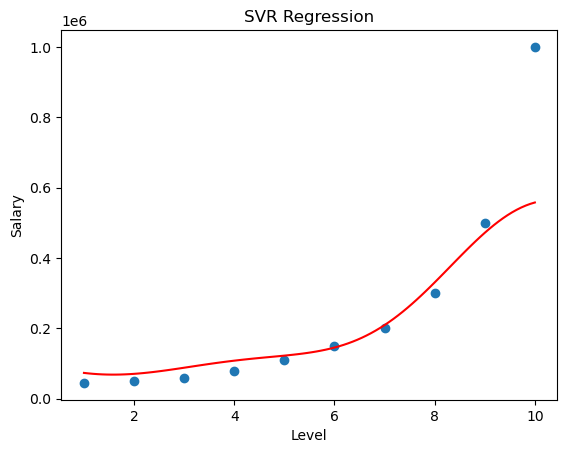

In [44]:
# generate a finer grid of x values
X_grid = np.linspace(sc_x.inverse_transform(X).min(), sc_x.inverse_transform(X).max(), 100).reshape(-1, 1)

plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y))
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1, 1)), color='red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('SVR Regression')
plt.show()
